# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [4]:
print("\nTipo de dados antes das correções:\n")
print(df.dtypes)
colunas_categoricas=[
    "Genero","Casado","Dependents", "PhoneService",
    "Servico_Internet", "Servico_Seguranca", "Suporte_Tecnico",
    "StreamingTV", "Tipo_Contrato", "PaymentMethod", "Churn"
]

df[colunas_categoricas] = df[colunas_categoricas].astype("category")

print("\nTipo de dados após as correções:\n")
print(df.dtypes) 


Tipo de dados antes das correções:

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

Tipo de dados após as correções:

customerID              object
Genero                category
Idoso                    int64
Casado                category
Dependents            category
Tempo_como_Cliente       int64
PhoneService          category
Servico_Internet      category
Servico_Seguranca     category
Suporte_Tecnico       category
StreamingTV           category
Tipo_Contrato         category
PaymentMethod         category
Pagamento_Mensal       float64


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
# Verificar a porcentagem de dados faltantes por coluna
missing_percent = df.isnull().mean() * 100

# Exibir apenas colunas que têm dados faltantes
missing_percent[missing_percent > 0].sort_values(ascending=False)


PhoneService        59.28
Pagamento_Mensal    13.00
Genero               0.48
Churn                0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [6]:
# Excluir linhas com dados ausentes em colunas importantes
df = df.dropna(subset=["Pagamento_Mensal", "Churn"])

# Verificar se ainda há dados ausentes
print(df.isnull().sum())

#Pagamento_Mensal:Se está ausente, não é possível inferir de forma confiável, pois depende de vários fatores
# Churn: Se está faltando, a linha não pode ser usada para modelagem ou análise de churn

customerID               0
Genero                   0
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1315
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal         0
Total_Pago               0
Churn                    0
dtype: int64


C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

count    2175.000000
mean     2298.104115
std      2268.309079
min        18.800000
25%       404.825000
50%      1410.250000
75%      3894.875000
max      8564.750000
Name: Total_Pago, dtype: float64
Genero
Male      1120
Female    1055
F            0
M            0
f            0
Name: count, dtype: int64


C:\Users\Léo\AppData\Local\Temp\ipykernel_19028\1283730982.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genero"].fillna(df["Genero"].mode()[0], inplace=True)


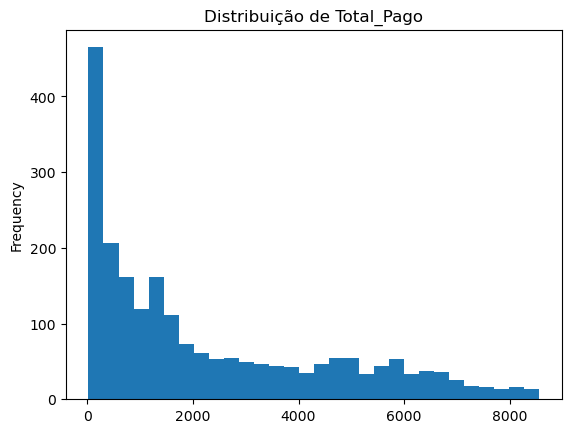

In [7]:
# Substituir pela MEDIANA se houver assimetria (outliers presentes)
print(df["Total_Pago"].describe())
df["Total_Pago"].plot(kind="hist", bins=30, title="Distribuição de Total_Pago")

# Substituição pela mediana:
df["Total_Pago"].fillna(df["Total_Pago"].median(), inplace=True)

# Verificar valor mais frequente
print(df["Genero"].value_counts())

# Substituir pela moda
df["Genero"].fillna(df["Genero"].mode()[0], inplace=True)


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [8]:
# Verificar valores únicos de todas as colunas categóricas
for col in df.select_dtypes(include="category").columns:
    print(f"\nValores únicos em '{col}':")
    print(df[col].unique())

# Corrigir letras minúsculas/maiúsculas e espaços
df["Servico_Internet"] = df["Servico_Internet"].str.strip().str.lower()

# Padronizar para capitalização inicial, se preferir
df["Servico_Internet"] = df["Servico_Internet"].replace({
    "dsl": "DSL",
    "fiber optic": "Fiber Optic",
    "no": "No"
})

# Repetir o processo para outras colunas
colunas_para_corrigir = ["Genero", "Casado", "Dependents", "PhoneService", 
                         "Servico_Seguranca", "Suporte_Tecnico", "StreamingTV", 
                         "Tipo_Contrato", "PaymentMethod", "Churn"]

for col in colunas_para_corrigir:
    df[col] = df[col].astype(str).str.strip().str.title()



Valores únicos em 'Genero':
['Female', 'Male']
Categories (5, object): ['F', 'Female', 'M', 'Male', 'f']

Valores únicos em 'Casado':
['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Valores únicos em 'Dependents':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Valores únicos em 'PhoneService':
['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']

Valores únicos em 'Servico_Internet':
['DSL', 'Fiber optic', 'No']
Categories (4, object): ['DSL', 'Fiber optic', 'No', 'dsl']

Valores únicos em 'Servico_Seguranca':
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Valores únicos em 'Suporte_Tecnico':
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Valores únicos em 'StreamingTV':
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Valores únicos em 'Tipo_Contrato':
['Month-to-month', 'One year', 'Two year']
Categories (3, object):

In [9]:
df.to_csv("CHURN_CREDIT_MOD14_PART2.csv", index=False)

print(df.describe())

             Idoso  Tempo_como_Cliente  Pagamento_Mensal   Total_Pago
count  2175.000000         2175.000000       2175.000000  2175.000000
mean      0.160920           32.441379         65.607563  2298.104115
std       0.367541           24.609875         29.931520  2268.309079
min       0.000000            0.000000         18.400000    18.800000
25%       0.000000            8.500000         39.500000   404.825000
50%       0.000000           29.000000         71.450000  1410.250000
75%       0.000000           56.000000         90.250000  3894.875000
max       1.000000           72.000000        118.650000  8564.750000
